# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.

In [7]:
# Extract all rows of data

for x in soup.find_all("tr", class_ = "data-row"):
   print(x.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# reference website https://medium.com/geekculture/web-scraping-tables-in-python-using-beautiful-soup-8bbc31c5803e

# Create an empty list

mars_data_ls = []

# Loop through the scraped data to create a list of rows

for x in soup.find_all('tr'):    
    columns = x.find_all('td')
    
    if(columns != []):
        id = columns[0].text.strip()
        terrestrial_date = columns[1].text.strip()
        sol = columns[2].text.strip()
        ls = columns[3].text.strip()
        month = columns[4].text.strip()
        min_temp = columns[5].text.strip()
        pressure = columns[6].text.strip()
        data = {"ID": id, "Terrestrial Date": terrestrial_date, "Sol": sol, "LS": ls, "Month": month, "Min Temp": min_temp, "Pressure": pressure,}

        mars_data_ls.append(data)


In [9]:

# Extra code that kept erroring since, "AttributeError: 'DataFrame' object has no attribute 'append'"

    # df = pd.DataFrame(columns=['ID', 'Terrestrial Date', 'Sol', 'LS', 'Month', 'Min Temp', 'Pressure'])

    # df = df.append({'ID': id,  
    #                 'Terrestrial Date': terrestrial_date, 
    #                 'Sol': sol, 
    #                 'LS': ls, 
    #                 'Month': month,   
    #                 'Min Temp': min_temp,
    #                 'Pressure': pressure}, 
    #                 ignore_index=True)

# Create a Pandas DataFrame by using the list of rows and a list of the column names

df = pd.DataFrame(mars_data_ls, columns=['ID', 'Terrestrial Date', 'Sol', 'LS', 'Month', 'Min Temp', 'Pressure'])



In [10]:
# Confirm DataFrame was created successfully
df.head(5)

,ID,Terrestrial Date,Sol,LS,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

ID                  object
Terrestrial Date    object
Sol                 object
LS                  object
Month               object
Min Temp            object
Pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df["ID"] = df["ID"].astype(str)  
df["Terrestrial Date"] = pd.to_datetime(df["Terrestrial Date"])  
df["LS"] = df["LS"].astype(int)  
df["Month"] = df["Month"].astype(int)  
df["Min Temp"] = df["Min Temp"].astype(float)  
df["Pressure"] = df["Pressure"].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

ID                          object
Terrestrial Date    datetime64[ns]
Sol                         object
LS                           int32
Month                        int32
Min Temp                   float64
Pressure                   float64
dtype: object

In [14]:
# double checking df

df.head(4)

,ID,Terrestrial Date,Sol,LS,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
df["Month"].value_counts().sort_index()

Month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [16]:
# 2. How many Martian days' worth of data are there?
len(df)

1867

In [17]:
# 3. What is the average low temperature by month?
df.groupby("Month")["Min Temp"].mean()

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp, dtype: float64

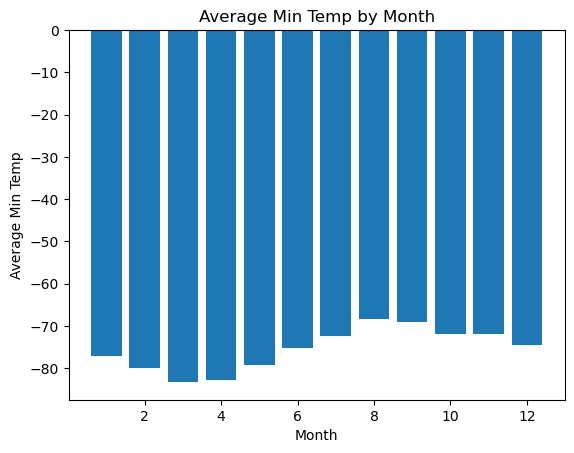

In [18]:
# Plot the average temperature by month

Avg_temps = df.groupby("Month")["Min Temp"].mean()
Months = Avg_temps.index

plt.bar(Months, Avg_temps)
plt.xlabel("Month")
plt.ylabel("Average Min Temp")
plt.title("Average Min Temp by Month")
plt.show()

In [19]:
Avg_temps = df.groupby("Month")["Min Temp"].mean()
sorted_temps = Avg_temps.sort_values(ascending = True)
ST_df = sorted_temps.reset_index()

In [20]:
month_sorted_df = pd.DataFrame(ST_df)

In [21]:
month_sorted_df

,Month,Min Temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


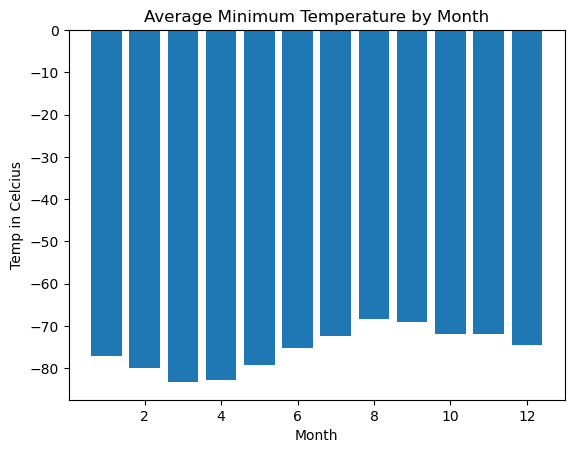

In [22]:

plt.bar(month_sorted_df["Month"], month_sorted_df ["Min Temp"])
plt.xlabel("Month")
plt.ylabel("Temp in Celcius")
plt.title("Average Minimum Temperature by Month")
plt.show()

In [37]:
# re sort the values for the next graph
df_coldest_hottest = month_sorted_df.sort_values("Min Temp", ascending=True)
df_coldest_hottest

,Month,Min Temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


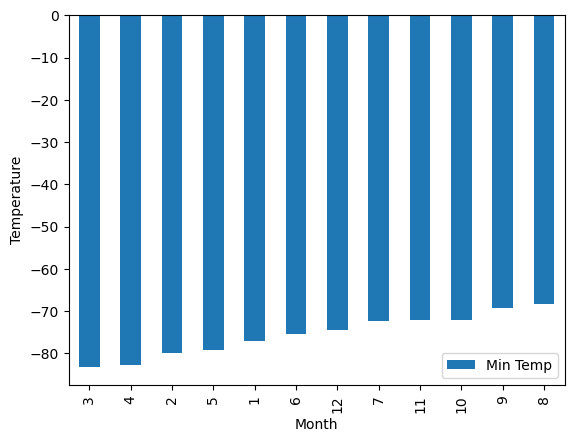

In [42]:
# Identify the coldest and hottest months in Curiosity's location

df_coldest_hottest.plot.bar(x="Month", y="Min Temp")

plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [52]:
# 4. Average pressure by Martian month

df.groupby("Month")["Pressure"].mean()

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

In [53]:
pressure_df = df.groupby("Month")["Pressure"].mean()

pressure_df = pd.DataFrame(pressure_df)

pressure_df.reset_index()

,Month,Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


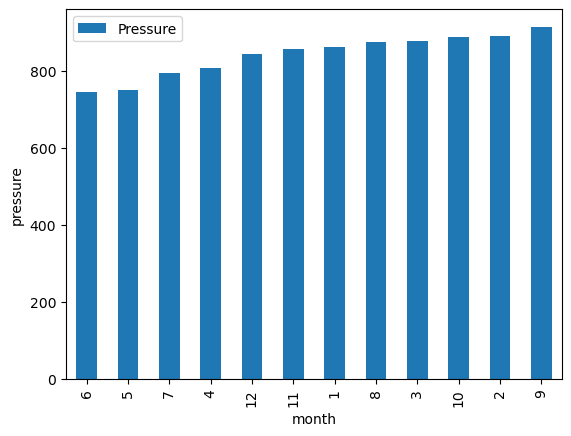

In [57]:
# Plot the average pressure by month
pressure_df = pressure_df.sort_values("Pressure")

pressure_df.plot.bar(x = "Month", y = "Pressure")
plt.xlabel("month")
plt.ylabel("pressure")
plt.show()

In [58]:
df.head(2)

,ID,Terrestrial Date,Sol,LS,Month,Min Temp,Pressure
1093,1119,2015-12-09,1188,79,3,-90.0,881.0
1144,1168,2016-01-31,1239,102,4,-89.0,818.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [64]:
# Write the data to a CSV
df.to_csv("Mars_data_frame.csv", index = False)

In [28]:
browser.quit()